# 데이터 인코딩

### sklearn.preprocessing.LabelEncoder
* from sklearn import preprocessing
* 문자열의 데이터를 숫자열로 바꾸어주는 라이브러리
    * fit(y) : 
    * transform(y) :
    * fit_transform(y) :

In [3]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서','믹서']

## lebelEncoder를 객체로 생성한 후, fit() 과 transform()으로 label 인코등 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

## 2차원 데이터로 변환합니다
labels = labels.reshape(-1,1)
print('인코딩 변환값:',labels)

인코딩 변환값: [[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]


In [4]:
print('인코딩 클래스:', encoder.classes_)
## classes_ : 인코딩 한 값의 클래스들 나열

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [5]:
print('디코딩 원본 값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))
## inverse_transform : 인코딩 한 값을 원래대로 디코딩해주기

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


#### 타이타닉 살아남을 확률
    * Survived, Sex, Age, Embarked 컬럼만 사용
    * feature는 Sex, Age, Emabarked
    * label은 Survived

* 데이터 전처리가 필요함
* 결측치가 관찰이 되어서 결측치 처리를 해야 함
* 문자열을 인코딩
* 결측치는 평균값으로 바꿔줌
* labelencoding을 이용하여 인코딩
* 결과를 데이터 프레임으로

In [6]:
import pandas as pd

In [7]:
titanic = pd.read_csv("../csv/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
titanic = titanic.drop(["Name","PassengerId","Pclass","SibSp","Parch","Ticket","Fare","Cabin"], axis=1)

In [9]:
titanic["Age"] = round(titanic["Age"].fillna(titanic["Age"].mean()),0)

In [10]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [11]:
titanic

,Survived,Sex,Age,Embarked
0,0,male,22.0,S
1,1,female,38.0,C
2,1,female,26.0,S
3,1,female,35.0,S
4,0,male,35.0,S
...,...,...,...,...
886,0,male,27.0,S
887,1,female,19.0,S
888,0,female,30.0,S
889,1,male,26.0,C


In [12]:
encoder.fit(titanic["Sex"])
labels = encoder.transform(titanic["Sex"])
print(labels)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [13]:
encoder.fit(titanic["Embarked"])
labels_1 = encoder.transform(titanic["Embarked"])
print(labels_1)

[2 0 2 2 2 1 2 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 1 2 2 2 0 2 1 2 0 0 1 2 0 2 0
 2 2 0 2 2 0 0 1 2 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2
 0 2 2 0 2 1 2 0 2 2 2 0 2 2 0 1 2 0 2 0 2 2 2 2 0 2 2 2 0 0 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 2 2 0 2 2 2
 2 1 2 1 2 2 2 2 2 0 0 1 2 1 2 2 2 2 0 2 2 2 0 1 0 2 2 2 2 1 0 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0 1 2 2 2 2 2 2 2 2 2 0 0 2 0
 2 1 2 2 2 1 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 1 2 2 2 2 0 2 2 2 1 2 0 0 2 2 0
 0 2 2 0 1 1 2 1 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 1 2 2 0 2 2 2 0 1 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 1 1 2 0 0 2 1 2 0 0 1 0
 0 2 2 0 2 0 2 0 0 2 0 0 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 0 0 2 0 2 2 2 1 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 

In [14]:
titanic["Sex"]= labels
titanic["Embarked"] = labels_1
titanic

,Survived,Sex,Age,Embarked
0,0,1,22.0,2
1,1,0,38.0,0
2,1,0,26.0,2
3,1,0,35.0,2
4,0,1,35.0,2
...,...,...,...,...
886,0,1,27.0,2
887,1,0,19.0,2
888,0,0,30.0,2
889,1,1,26.0,0


### sklearn.preprocessing.OneHotEncoder
* from sklearn.preprocessing import OneHotEncoder
* Feature 값에 새로운 Feature를 추가하고 고유값에 해당하는 칼럼에 1을 표시
* 나머지 Feature 값에는 0을 표시하는 방식

In [15]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [16]:
## 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels_2 = encoder.transform(items)

## OneHotEncoder
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels_2)
oh_labels = oh_encoder.transform(labels_2)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

ValueError: Expected 2D array, got 1D array instead:
array=[0 1 4 5 3 3 2 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Pandas.get_dummies
* pd.get_dummies()
* pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)


In [ ]:
import pandas as pd
ti = pd.read_csv("../csv/train.csv")
ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
ti = ti.drop(["Name","PassengerId","Pclass","SibSp","Parch","Ticket","Fare","Cabin"], axis=1)

In [ ]:
ti

,Survived,Sex,Age,Embarked
0,0,male,22.0,S
1,1,female,38.0,C
2,1,female,26.0,S
3,1,female,35.0,S
4,0,male,35.0,S
...,...,...,...,...
886,0,male,27.0,S
887,1,female,19.0,S
888,0,female,NaN,S
889,1,male,26.0,C


In [ ]:
ti["Age"] = round(ti["Age"].fillna(ti["Age"].mean()),0)
ti["Embarked"] = ti["Embarked"].fillna("S")

In [ ]:
ti

,Survived,Sex,Age,Embarked
0,0,male,22.0,S
1,1,female,38.0,C
2,1,female,26.0,S
3,1,female,35.0,S
4,0,male,35.0,S
...,...,...,...,...
886,0,male,27.0,S
887,1,female,19.0,S
888,0,female,30.0,S
889,1,male,26.0,C


In [ ]:
ti_data = ti.loc[:, 'Embarked']
ti_data

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
dummy_em = pd.get_dummies(ti_data)

In [ ]:
dummy_dt = pd.get_dummies(ti[['Sex','Embarked']])

In [ ]:
dummy_dt

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [ ]:
dummy = pd.concat([ti, dummy_dt],axis = 1)
dummy.drop(columns=["Sex","Embarked"], inplace=True)

In [ ]:
dummy

,Survived,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,1,0,0,1
...,...,...,...,...,...,...,...
886,0,27.0,0,1,0,0,1
887,1,19.0,1,0,0,0,1
888,0,30.0,1,0,0,0,1
889,1,26.0,0,1,1,0,0


# 데이터 스케일링


### Standard, Min-Max, Robust 비교 고찰
* StandardScaler : 평균이 0이고, 분산이 1인 정규 분포 형태로 변환
* MinMaxScaler : 데이터 값을 0과 1사이의 범위 값으로 변환(음수 값이 있으면 -1에서 1값으로 변환)
* RobustScaler : 특성들이 같은 스케일을 갖게 되지만 평균대신 중앙값을 사용 ==> 극단값에 영향을 받지 않음

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

In [19]:
scaler = StandardScaler()
standard = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard, columns=['x1','x2'])

In [20]:
scaler = MinMaxScaler()
minmax = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax, columns=['x1','x2'])

In [21]:
scaler = RobustScaler()
Robust = scaler.fit_transform(x)
Robust_df = pd.DataFrame(Robust, columns=['x1','x2'])

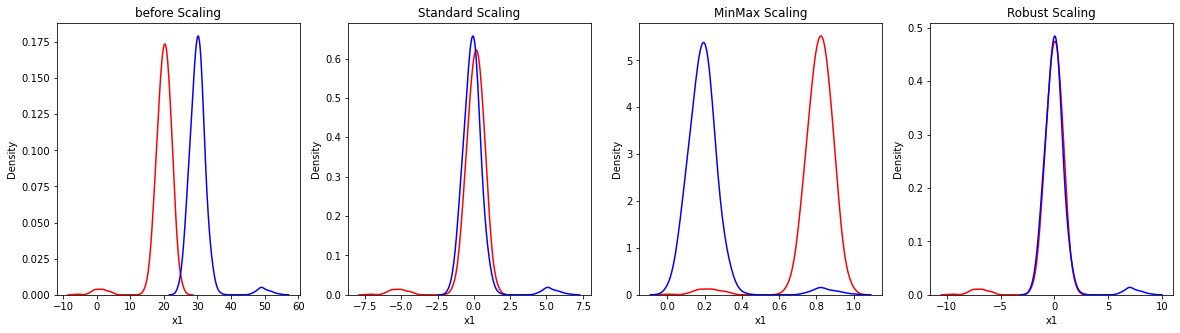

In [22]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')


ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax=ax2, color='r')
sns.kdeplot(standard_df['x2'], ax=ax2, color='b')

ax3.set_title("MinMax Scaling")
sns.kdeplot(minmax_df['x1'], ax=ax3, color='r')
sns.kdeplot(minmax_df['x2'], ax=ax3, color='b')

ax4.set_title("Robust Scaling")
sns.kdeplot(Robust_df['x1'], ax=ax4, color='r')
sns.kdeplot(Robust_df['x2'], ax=ax4, color='b')

plt.show()

In [23]:
from sklearn.datasets import load_iris


In [24]:
## 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산값')
print(iris_df.var())            ## var=분산 인가부다

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [53]:
## StandardScaler 객체 생성
scaler = StandardScaler()

## StandardScaler 로 데이터 셋 변환 .fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

## transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_df_scaled_1 = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값' )
print(iris_df_scaled_1.mean())
print('\nfeature 들의 표준편차 값')
print(iris_df_scaled_1.std())             ## std = 표준편차 인가부다

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 표준편차 값
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


In [55]:
## MinMaxScaler 객체 생성
scaler = MinMaxScaler()

## MinMaxScaler로 데이터 셋 변환. fit() 과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

## transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled_2 = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최소값')
print(iris_df_scaled_2.min())
print('feature들의 최대값')
print(iris_df_scaled_2.max())

feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [34]:
from sklearn.preprocessing import RobustScaler

In [35]:
##########데이터 로드

#hour, attendance, score
df = pd.DataFrame([
    [2, 1, 3],
    [3, 2, 5],
    [3, 4, 7],
    [5, 5, 10],
    [7, 5, 12],
    [2, 5, 7],
    [8, 9, 13],
    [9, 10, 13],
    [6, 12, 12],
    [9, 2, 13],
    [6, 10, 12],
    [2, 4, 6]
], columns=['hour', 'attendance', 'score'])

##########데이터 분석

##########데이터 전처리

x_data = df.drop(['score'], axis=1) 
y_data = df['score']

In [36]:
transformer = RobustScaler()
transformer.fit(x_data)
#print(transformer.center_) #[5.5 5. ]
#print(transformer.scale_) #[4.5  5.75]
x_data = transformer.transform(x_data) 

In [37]:
transformer = RobustScaler()
x_data = transformer.fit_transform(x_data)
print(x_data)

[[-0.77777778 -0.69565217]
 [-0.55555556 -0.52173913]
 [-0.55555556 -0.17391304]
 [-0.11111111  0.        ]
 [ 0.33333333  0.        ]
 [-0.77777778  0.        ]
 [ 0.55555556  0.69565217]
 [ 0.77777778  0.86956522]
 [ 0.11111111  1.2173913 ]
 [ 0.77777778 -0.52173913]
 [ 0.11111111  0.86956522]
 [-0.77777778 -0.17391304]]


In [38]:
#hour, attendance
x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])

#'''
transformer = RobustScaler()
transformer.fit(x_data)
#print(transformer.center_) #[5.5 5. ]
#print(transformer.scale_) #[4.5  5.75]
x_data = transformer.transform(x_data) 
#'''
'''
transformer = RobustScaler()
x_data = transformer.fit_transform(x_data)
'''
'''
x_data = robust_scale(x_data)
'''

print(x_data.shape) #(6000, 2)
print(x_data[:2])

(12, 2)
[[-0.77777778 -0.69565217]
 [-0.55555556 -0.52173913]]


In [39]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()
rbscaler.fit(iris_df)
iris_rbscaled = rbscaler.transform(iris_df)
iris_df_rbscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rbscaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


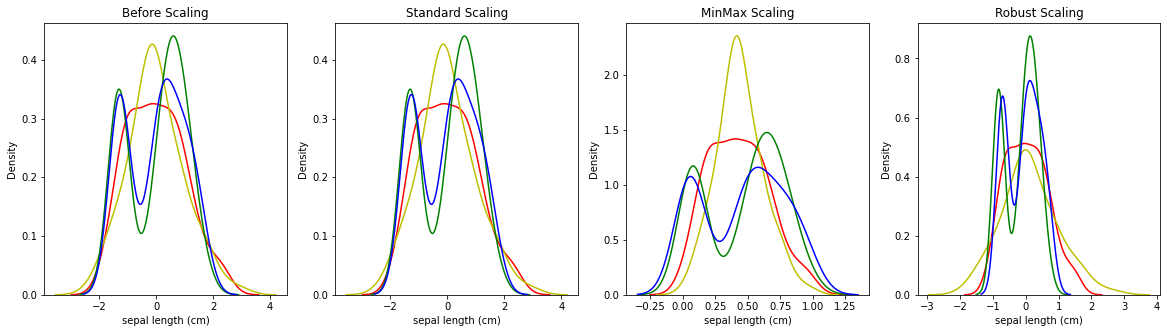

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax1, color = 'b')
ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_scaled_1['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_df_scaled_1['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_df_scaled_1['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_df_scaled_1['petal width (cm)'], ax = ax2, color = 'b')
ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_scaled_2['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_scaled_2['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_scaled_2['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_scaled_2['petal width (cm)'], ax = ax3, color = 'b')
ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rbscaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_rbscaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_rbscaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_rbscaled['petal width (cm)'], ax = ax4, color = 'b')
plt.show()

#### Titanic 생존자 예측
* Name sibsp parch ticket fare passengerId

In [90]:
ttn = pd.read_csv("../csv/train.csv")
ttn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
ttn = ttn.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket","Fare","Cabin"], axis=1)


In [92]:
ttn.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [93]:
ttn['Age'].fillna(ttn["Age"].mean(), inplace=True)
ttn['Embarked'].fillna('N', inplace=True)
ttn.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [94]:
ttn

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
886,0,2,male,27.000000,S
887,1,1,female,19.000000,S
888,0,3,female,29.699118,S
889,1,1,male,26.000000,C


In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [96]:
encoder.fit_transform(ttn["Sex"])
label = encoder.transform(ttn["Sex"])
label

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [97]:
encoder.fit_transform(ttn["Embarked"])
labels = encoder.transform(ttn["Embarked"])
labels

array([3, 0, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3,
       2, 3, 3, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0,
       2, 3, 2, 2, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 1, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 0, 3, 3, 0, 3, 2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 2, 3, 0, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3,
       3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 0, 0, 2, 3,
       2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 2, 0, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2,
       3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 0,
       3, 3, 3, 2, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 2,

In [98]:
ttn["Sex"]=label
ttn["Embarked"]=labels

In [99]:
ttn

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.000000,3
1,1,1,0,38.000000,0
2,1,3,0,26.000000,3
3,1,1,0,35.000000,3
4,0,3,1,35.000000,3
...,...,...,...,...,...
886,0,2,1,27.000000,3
887,1,1,0,19.000000,3
888,0,3,0,29.699118,3
889,1,1,1,26.000000,0


In [119]:
ttn_Data = ttn.Pclass, ttn.Sex, ttn.Age, ttn.Embarked

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt_clf = DecisionTreeClassifier(random_state=120)

data = ttn_Data
label_t = ttn.Survived

scores = cross_val_score(dt_clf, data, label_t, scoring='accuracy', cv=5)


AttributeError: 'tuple' object has no attribute 'Age'

In [112]:
label_t.shape


(891,)

In [115]:
data.shape

(891,)